# Distribution de mes notations
Premier programme en J.N

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Chargement du fichier & vérification de la taille, on regarde les headers et on remplace les valeurs nulles par "0"

In [2]:
# Chargement du fichier dans un dataframe
df = pd.read_csv("MyMoviesCompleted.csv", sep=";", 
                 parse_dates=["viewing_date", "release_date"], 
                 decimal = ",")
# On remplit les vides avec 0
df = df.fillna("0")

# On convertit les types "objets" en entiers ou décimaux selon
df['imdb_rating'] = df['imdb_rating'].astype(float)
df['vote_average'] = df['vote_average'].astype(float)
df['vote_count'] = df['vote_count'].astype(int)
df['personal_rating'] = df['personal_rating'].astype(int)
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)
df['runtime'] = df['runtime'].astype(int)
df['production_countries_number'] = df['production_countries_number'].astype(int)
df['production_companies_number'] = df['production_companies_number'].astype(int)
df['actor_number'] = df['actor_number'].astype(int)
df['director_number'] = df['director_number'].astype(int)
df['producer_number'] = df['producer_number'].astype(int)
df['genre_number'] = df['genre_number'].astype(int)

# On multiplie mes notes par 2 pour être homogène à une note sur 10
df['personal_rating'] = df['personal_rating']*2

# Distribution & moyenne des ratings

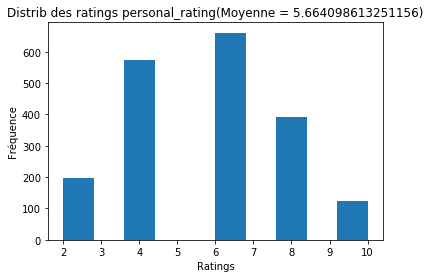

In [16]:
# Choix du rating personal_rating, imdb_rating, tmdb_rating = vote_average
QuelsRatings = "personal_rating"

# filtrage des non nuls, histogramme & calcul moyenne
rated_movies_filtre = df[QuelsRatings]>0
filtered_movies = df[rated_movies_filtre]
plt.hist(filtered_movies[QuelsRatings])
plt.xlabel("Ratings")
plt.ylabel("Fréquence")
plt.title("Distrib des ratings " + QuelsRatings + "(Moyenne = " + str(np.mean(filtered_movies[QuelsRatings]))+")")
plt.show()

# Conclusion : je suis plus sévère que tmdb qui est plus severe qu'imdb

# Sous totaux
par exemple nb de films par langue, production_country, etc. et on graphe les 10 plus populaires

In [ ]:
languespopu = df["original_language"].value_counts()
plt.hist(languespopu[:10])
plt.show()

In [ ]:
# On peut afficher les types des colonnes pour vérifier avec df.dtypes()
df.dtypes

# Filtrage conditionnel d'un bout de dataframe

In [17]:
# par exemple en langue jap avec un rating perso>4
films_jap = df["original_language"]== "ja"
bons_films = df["personal_rating"] > 4
df[films_jap & bons_films]

,title,imdb_rating,viewing_date,personal_rating,children,tmdb_id,original_language,vote_count,vote_average,release_date,...,production_countries_number,production_company,production_companies_number,genre,genre_number,director,director_number,producer,producer_number,actor_number
0,The face of another,8.0,2015-12-19,6,none,29452,ja,44,7.5,1966-07-15,...,1,Toho Film (Eiga) Co. Ltd.,2,Drama,2,Hiroshi Teshigahara,1,Nobuyo Horiba,3,10
99,Wings of hope,7.7,2016-03-13,8,none,311296,ja,1,8.0,1998-12-02,...,1,Kodansha,1,none,0,Keitaro Motonaga,2,Kenichiro Tsunoda,1,16
159,A.K,0.0,2009-01-08,8,S,396485,ja,7,6.0,1985-05-20,...,2,Nippon Herald Films,3,History,2,Chris Marker,1,Masato Hara,2,15
189,Noriko's dinner table,7.2,2015-12-28,6,none,42041,ja,29,6.9,2005-06-04,...,1,none,0,Drama,3,Sion Sono,1,none,0,16
209,Pale flower,7.8,2015-11-29,6,none,61475,ja,19,6.6,1964-03-01,...,1,Bungei Production Ninjin Club,1,Action,4,Masahiro Shinoda,1,none,0,7
248,Why Don't You Play in Hell?,7.3,2015-09-19,6,none,134350,ja,66,7.0,2013-09-14,...,1,King Record Co.,5,Drama,3,Sion Sono,1,Takuyuki Matsuno,2,17
270,Vers l'autre rive,6.0,2015-10-10,8,none,334991,ja,10,6.8,2015-09-30,...,1,WoWow,7,Fantasy,3,Kiyoshi Kurosawa,1,Hitoshi Endo,3,5
377,Irezumi,7.3,2015-04-18,6,none,88435,ja,5,8.0,1965-11-13,...,1,Nikkatsu,1,Drama,4,Seijun Suzuki,1,none,0,15
388,Irezumi,7.3,2015-05-04,6,none,88435,ja,5,8.0,1965-11-13,...,1,Nikkatsu,1,Drama,4,Seijun Suzuki,1,none,0,15
392,Deadly fight in Hiroshima,7.5,2015-01-04,6,none,52980,ja,12,7.7,1973-04-28,...,1,TOEI,1,Drama,3,Kinji Fukasaku,1,Gorô Kusakabe,1,17


# Question : moyenne de mes notes selon le langage
Suis je plus clément pour les films jap ou polonais ?

In [28]:
# Moyenne de tous les champs numériques des films regroupés en langages
moyennes = df.groupby("production_country").mean()
# On affiche par budget décroissant
moyennes.sort_values("budget", ascending = False)

,imdb_rating,personal_rating,vote_count,vote_average,budget,revenue,runtime,production_countries_number,production_companies_number,genre_number,director_number,producer_number,actor_number
production_country,,,,,,,,,,,,,
New Zealand,6.577778,4.444444,1680.000000,5.988889,8.822222e+07,2.782511e+08,153.555556,1.888889,3.111111,2.555556,1.222222,3.222222,23.444444
Australia,4.093750,4.875000,2164.312500,6.531250,6.357812e+07,1.327267e+08,110.250000,2.250000,3.187500,2.875000,1.125000,2.687500,24.937500
Iceland,5.600000,4.500000,1086.500000,6.850000,4.500000e+07,1.356038e+08,114.750000,2.750000,4.500000,2.750000,1.000000,4.750000,30.750000
United States of America,4.093134,5.286567,960.004478,6.713582,2.579202e+07,1.026154e+08,108.941791,1.085075,2.274627,2.532836,1.050746,2.008955,26.220896
Canada,3.587037,5.185185,1034.574074,6.562963,2.400536e+07,7.233543e+07,108.037037,1.962963,3.629630,2.425926,1.055556,2.018519,20.037037
United Arab Emirates,4.600000,6.000000,288.000000,5.600000,2.333333e+07,1.982868e+07,107.666667,2.000000,6.000000,1.666667,1.000000,3.333333,17.666667
India,3.350000,5.428571,656.285714,6.457143,2.067786e+07,8.872660e+07,138.571429,1.571429,3.071429,1.928571,1.071429,1.500000,32.285714
South Africa,4.766667,5.333333,620.666667,7.833333,2.066667e+07,1.367925e+07,65.000000,2.000000,3.666667,2.000000,1.000000,0.666667,11.333333
China,4.709524,4.761905,756.047619,6.895238,1.989810e+07,7.185792e+07,112.714286,1.809524,2.619048,2.761905,1.142857,2.190476,17.952381
